In [10]:
%matplotlib notebook

In [1]:
import tensorflow as tf
import numpy as np
import time

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles

In [2]:
DATA_TYPE = 'blobs'

In [3]:
# Number of clusters, if we choose circles, only 2 will be enough
if (DATA_TYPE == 'circle'):
    K=2
else:
    K=4

In [4]:
# Maximum number of iterations, if the conditions are not met
MAX_ITERS = 1000
N=200

In [5]:
start = time.time()

In [8]:
centers = [(-2, -2), (-2, 1.5), (1.5, -2), (2, 1.5)]
if (DATA_TYPE == 'circle'):
    data, features = make_circles(n_samples=200, shuffle=True, noise= 0.01, factor=0.4)
else:
    data, features = make_blobs(n_samples=200, centers=centers, n_features = 2, cluster_std=0.8, shuffle=False, random_state=42)

In [9]:
print(features)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


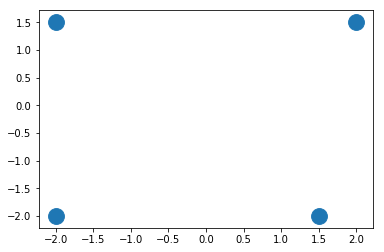

In [32]:
fig, ax = plt.subplots()
ax.scatter(np.asarray(centers).transpose()[0], np.asarray(centers).transpose()[1], marker = 'o', s = 250)
plt.show()

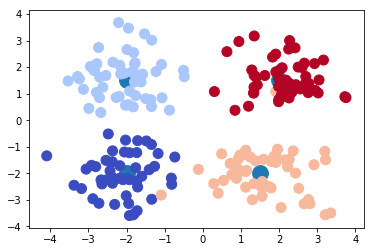

In [33]:
fig, ax = plt.subplots()
if (DATA_TYPE == 'blobs'):
	ax.scatter(np.asarray(centers).transpose()[0], np.asarray(centers).transpose()[1], marker = 'o', s = 250)
	ax.scatter(data.transpose()[0], data.transpose()[1], marker = 'o', s = 100, c = features, cmap=plt.cm.coolwarm )
	plt.plot()

In [34]:
points=tf.Variable(data)
cluster_assignments = tf.Variable(tf.zeros([N], dtype=tf.int64))

In [35]:
centroids = tf.Variable(tf.slice(points.initialized_value(), [0,0], [K,2]))

In [36]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [39]:
sess.run(centroids)

array([[-1.60262868, -2.11061144],
       [-1.48184917, -0.78157611],
       [-2.1873227 , -2.18730957],
       [-0.73662975, -1.38605222]])

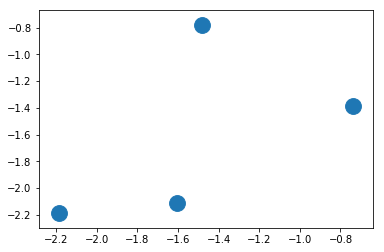

In [40]:
fig, ax = plt.subplots()
ax.scatter(sess.run(centroids).transpose()[0], sess.run(centroids).transpose()[1], marker = 'o', s = 250)
plt.show()

In [41]:
rep_centroids = tf.reshape(tf.tile(centroids, [N, 1]), [N, K, 2])
rep_points = tf.reshape(tf.tile(points, [1, K]), [N, K, 2])
sum_squares = tf.reduce_sum(tf.square(rep_points - rep_centroids), 
reduction_indices=2)

In [44]:
best_centroids = tf.argmin(sum_squares, 1)

In [45]:
sess.run(best_centroids)

array([0, 1, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2,
       2, 1, 0, 0, 2, 3, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3,
       1, 3], dtype=int64)

In [46]:
did_assignments_change = tf.reduce_any(tf.not_equal(best_centroids, cluster_assignments))

In [47]:
def bucket_mean(data, bucket_ids, num_buckets):
	total = tf.unsorted_segment_sum(data, bucket_ids, num_buckets)
	count = tf.unsorted_segment_sum(tf.ones_like(data), bucket_ids, num_buckets)
	return total / count

In [48]:
means = bucket_mean(points, best_centroids, K)

In [49]:
sess.run(means)

array([[-1.39084641, -2.37524434],
       [-1.81958467,  1.30888823],
       [-2.48871427, -2.35871549],
       [ 1.87437709, -0.34414179]])

In [50]:
with tf.control_dependencies([did_assignments_change]):
	do_updates = tf.group(
	centroids.assign(means),
	cluster_assignments.assign(best_centroids))

In [51]:
changed = True
iters = 0


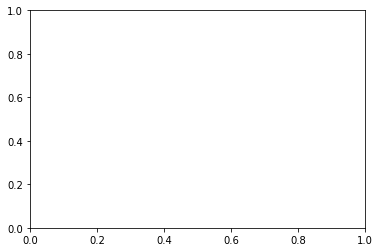

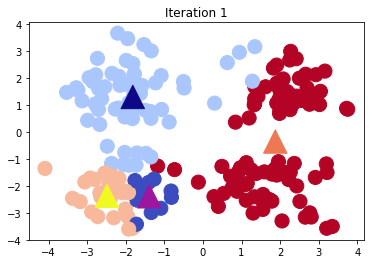

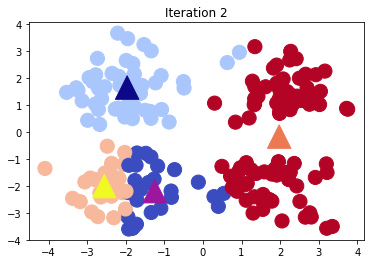

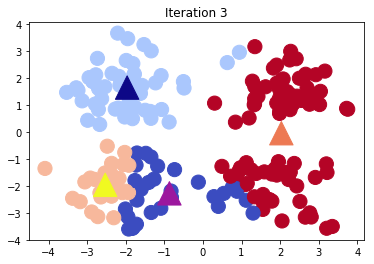

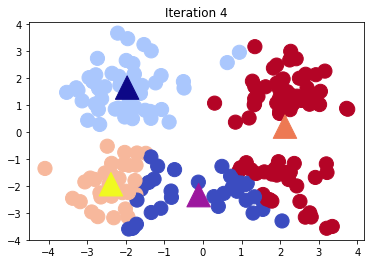

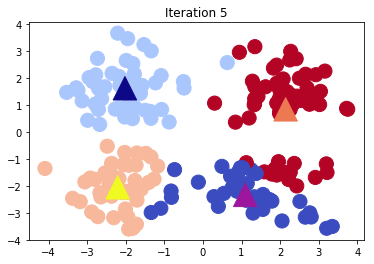

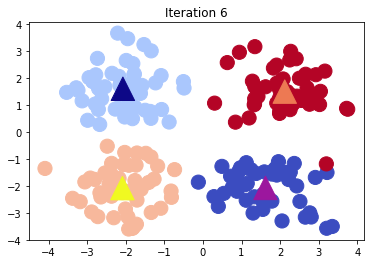

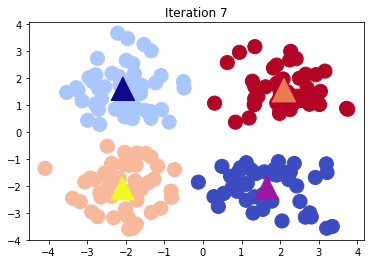

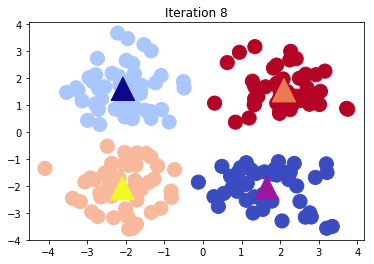

In [52]:
fig, ax = plt.subplots()
if (DATA_TYPE == 'blobs'):
    colourindexes=[2,1,4,3]
else:
    colourindexes=[2,1]
while changed and iters < MAX_ITERS:
	fig, ax = plt.subplots()
	iters += 1
	[changed, _] = sess.run([did_assignments_change, do_updates])
	[centers, assignments] = sess.run([centroids, cluster_assignments])
	ax.scatter(sess.run(points).transpose()[0], sess.run(points).transpose()[1], marker = 'o', s = 200, c = assignments, cmap=plt.cm.coolwarm )
	ax.scatter(centers[:,0],centers[:,1], marker = '^', s = 550, c = colourindexes, cmap=plt.cm.plasma)
	ax.set_title('Iteration ' + str(iters))
	plt.savefig("kmeans" + str(iters) +".png")

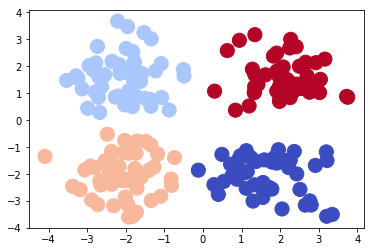

In [56]:
fig, ax = plt.subplots()
ax.scatter(sess.run(points).transpose()[0], sess.run(points).transpose()[1], marker = 'o', s = 200, c = assignments, cmap=plt.cm.coolwarm )
plt.show()

In [55]:
end = time.time()
print ("Found in %.2f seconds" % (end-start)), iters, "iterations"
print ("Centroids:")
print (centers)
print ("Cluster assignments:", assignments)

Found in 12851.94 seconds
Centroids:
[[ 1.65289262 -2.04643427]
 [-2.0763623   1.61204964]
 [-2.08862822 -2.07255306]
 [ 2.09831502  1.55936014]]
Cluster assignments: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 3 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
